In [30]:
from keras import models
from keras import layers

import keras
import os
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import random
from keras import models
from keras import layers
from keras.callbacks import TensorBoard, ModelCheckpoint
from keras.models import Model, load_model, Sequential
from keras.optimizers import RMSprop
from keras.layers import Dense, GlobalAveragePooling2D, Input, Dropout

%matplotlib inline

share_dir = '/home/ubuntu/workspace/share/ai_osteoporosis_hip'
crop_dir = os.path.join(share_dir, 'crop')
xls_dir = os.path.join(share_dir, 'excel_files')
#data_dir = '/home/ubuntu/workspace/share/gbpolyp/final_data'
work_dir = '/home/ubuntu/workspace/ai_osteoporosis_hip'
xls_file = os.path.join(xls_dir, 'final.xlsx')

def generate_df(xls_file):
    df = pd.read_excel(xls_file, dtype={'patient_id':str})

    d1 = df[df['split']==1]

    columns_list = ['age', 'height', 'weight', 'bmi']
    
    for column_name in columns_list:
        mean = d1[column_name].mean()
        std = d1[column_name].std()
        df[column_name] = df[column_name].apply(lambda x: (x - mean) / std)
        
    sex_to_code = {'M': 1, 'F':0}
    df['sex_code'] = df['sex'].apply(lambda x: sex_to_code[x])    
    
    return df


def get_data(df, set_name):
    count = 0

    set_dict = {'train':1, 'validation':2, 'test':3}
    set_code = set_dict[set_name]
    data = df[df['split']==set_code]
    count = len(data)
    print('total images = %d' % count)

    clinical_data = np.ndarray((count, 3), dtype=np.float32)
    y_data = np.ndarray((count, ), dtype=np.int8)

    i = 0

    for i in range(len(data)):
        age = data.iloc[i]['age']
        sex = data.iloc[i]['sex_code']
        bmi = data.iloc[i]['bmi']
        class2_1 = data.iloc[i]['class2_1']

        clinical_data[i] = (age, sex, bmi)
        y_data[i] = class2_1
        i += 1

    return clinical_data, y_data

def resample(df):
    resampled_list = []
    
    for i in range(len(df)):
        age = df.iloc[i]['age']
        sex = df.iloc[i]['sex_code']
        bmi = df.iloc[i]['bmi']
        class2_1 = df.iloc[i]['class2_1']
        split = df.iloc[i]['split']
        if class2_1 == 0:
            resampled_list.append((age, sex, bmi, class2_1, split))
        else:
            resampled_list.append((age, sex, bmi, class2_1, split))
            resampled_list.append((age, sex, bmi, class2_1, split))
            resampled_list.append((age, sex, bmi, class2_1, split))
    
    random.shuffle(resampled_list)
    df2 = pd.DataFrame(resampled_list[0:200], columns=['age', 'sex_code', 'bmi', 'class2_1', 'split'])
                     
    return df2

df1 = generate_df(xls_file)
df = resample(df1)

clinical_train, y_train = get_data(df, 'train')
clinical_validation, y_validation = get_data(df, 'validation')
clinical_test, y_test = get_data(df, 'test')

total images = 163
total images = 27
total images = 3


In [23]:
from keras.regularizers import l2

def get_model(hidden_layer):
    model = models.Sequential()
    model.add(layers.Dense(hidden_layer, kernel_regularizer=l2(0.001), activation='relu', input_dim=3))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(hidden_layer, kernel_regularizer=l2(0.001), activation='relu'))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(hidden_layer, kernel_regularizer=l2(0.001), activation='relu'))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer=RMSprop(lr=0.0001), loss='binary_crossentropy', metrics=['acc'])
    return model

In [50]:
model = models.Sequential()
hidden_layer = 10
model.add(layers.Dense(hidden_layer, activation='relu', input_dim=3))
model.add(layers.Dense(hidden_layer, activation='relu'))
model.add(layers.Dense(hidden_layer, activation='relu'))
model.add(layers.Dense(hidden_layer, activation='relu'))
model.add(layers.Dense(hidden_layer, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['acc'])
#model.compile(optimizer=RMSprop(lr=0.00001), loss='binary_crossentropy', metrics=['acc'])
history = model.fit(clinical_train, y_train, validation_data=(clinical_validation, y_validation), epochs=3000, batch_size=256, verbose=1)

Train on 163 samples, validate on 27 samples
Epoch 1/3000
163/163 [==============================] - 1s 5ms/step - loss: 0.6945 - acc: 0.5706 - val_loss: 0.6953 - val_acc: 0.4074
Epoch 2/3000
163/163 [==============================] - 0s 45us/step - loss: 0.6917 - acc: 0.6380 - val_loss: 0.6954 - val_acc: 0.4444
Epoch 3/3000
163/163 [==============================] - 0s 46us/step - loss: 0.6891 - acc: 0.6626 - val_loss: 0.6938 - val_acc: 0.5185
Epoch 4/3000
163/163 [==============================] - 0s 45us/step - loss: 0.6853 - acc: 0.7055 - val_loss: 0.6920 - val_acc: 0.5556
Epoch 5/3000
163/163 [==============================] - 0s 48us/step - loss: 0.6817 - acc: 0.7117 - val_loss: 0.6900 - val_acc: 0.6296
Epoch 6/3000
163/163 [==============================] - 0s 44us/step - loss: 0.6784 - acc: 0.7117 - val_loss: 0.6887 - val_acc: 0.5926
Epoch 7/3000
163/163 [==============================] - 0s 48us/step - loss: 0.6755 - acc: 0.7178 - val_loss: 0.6867 - val_acc: 0.6296
Epoch 8/300

Epoch 61/3000
163/163 [==============================] - 0s 47us/step - loss: 0.5506 - acc: 0.7362 - val_loss: 0.6556 - val_acc: 0.5556
Epoch 62/3000
163/163 [==============================] - 0s 48us/step - loss: 0.5485 - acc: 0.7423 - val_loss: 0.6572 - val_acc: 0.5556
Epoch 63/3000
163/163 [==============================] - 0s 46us/step - loss: 0.5464 - acc: 0.7362 - val_loss: 0.6562 - val_acc: 0.5556
Epoch 64/3000
163/163 [==============================] - 0s 46us/step - loss: 0.5443 - acc: 0.7362 - val_loss: 0.6578 - val_acc: 0.5556
Epoch 65/3000
163/163 [==============================] - 0s 48us/step - loss: 0.5423 - acc: 0.7362 - val_loss: 0.6570 - val_acc: 0.5556
Epoch 66/3000
163/163 [==============================] - 0s 45us/step - loss: 0.5404 - acc: 0.7423 - val_loss: 0.6582 - val_acc: 0.5556
Epoch 67/3000
163/163 [==============================] - 0s 42us/step - loss: 0.5385 - acc: 0.7423 - val_loss: 0.6577 - val_acc: 0.5556
Epoch 68/3000
163/163 [=========================

163/163 [==============================] - 0s 34us/step - loss: 0.4839 - acc: 0.7485 - val_loss: 0.6753 - val_acc: 0.6296
Epoch 122/3000
163/163 [==============================] - 0s 35us/step - loss: 0.4834 - acc: 0.7485 - val_loss: 0.6862 - val_acc: 0.5926
Epoch 123/3000
163/163 [==============================] - 0s 37us/step - loss: 0.4828 - acc: 0.7485 - val_loss: 0.6779 - val_acc: 0.6296
Epoch 124/3000
163/163 [==============================] - 0s 35us/step - loss: 0.4824 - acc: 0.7485 - val_loss: 0.6857 - val_acc: 0.5926
Epoch 125/3000
163/163 [==============================] - 0s 32us/step - loss: 0.4819 - acc: 0.7485 - val_loss: 0.6781 - val_acc: 0.6296
Epoch 126/3000
163/163 [==============================] - 0s 29us/step - loss: 0.4814 - acc: 0.7485 - val_loss: 0.6866 - val_acc: 0.6296
Epoch 127/3000
163/163 [==============================] - 0s 51us/step - loss: 0.4810 - acc: 0.7485 - val_loss: 0.6781 - val_acc: 0.6296
Epoch 128/3000
163/163 [==============================] 

Epoch 181/3000
163/163 [==============================] - 0s 37us/step - loss: 0.4578 - acc: 0.7669 - val_loss: 0.6671 - val_acc: 0.7407
Epoch 182/3000
163/163 [==============================] - 0s 33us/step - loss: 0.4575 - acc: 0.7607 - val_loss: 0.6754 - val_acc: 0.7407
Epoch 183/3000
163/163 [==============================] - 0s 31us/step - loss: 0.4572 - acc: 0.7669 - val_loss: 0.6646 - val_acc: 0.7407
Epoch 184/3000
163/163 [==============================] - 0s 32us/step - loss: 0.4569 - acc: 0.7607 - val_loss: 0.6797 - val_acc: 0.7037
Epoch 185/3000
163/163 [==============================] - 0s 26us/step - loss: 0.4565 - acc: 0.7669 - val_loss: 0.6576 - val_acc: 0.7407
Epoch 186/3000
163/163 [==============================] - 0s 40us/step - loss: 0.4564 - acc: 0.7607 - val_loss: 0.6793 - val_acc: 0.7037
Epoch 187/3000
163/163 [==============================] - 0s 36us/step - loss: 0.4558 - acc: 0.7607 - val_loss: 0.6637 - val_acc: 0.7407
Epoch 188/3000
163/163 [=================

Epoch 241/3000
163/163 [==============================] - 0s 40us/step - loss: 0.4372 - acc: 0.7730 - val_loss: 0.6571 - val_acc: 0.7407
Epoch 242/3000
163/163 [==============================] - 0s 32us/step - loss: 0.4370 - acc: 0.7791 - val_loss: 0.6794 - val_acc: 0.7037
Epoch 243/3000
163/163 [==============================] - 0s 31us/step - loss: 0.4366 - acc: 0.7730 - val_loss: 0.6604 - val_acc: 0.7407
Epoch 244/3000
163/163 [==============================] - 0s 29us/step - loss: 0.4363 - acc: 0.7791 - val_loss: 0.6772 - val_acc: 0.7037
Epoch 245/3000
163/163 [==============================] - 0s 28us/step - loss: 0.4359 - acc: 0.7730 - val_loss: 0.6640 - val_acc: 0.7407
Epoch 246/3000
163/163 [==============================] - 0s 28us/step - loss: 0.4356 - acc: 0.7730 - val_loss: 0.6755 - val_acc: 0.7037
Epoch 247/3000
163/163 [==============================] - 0s 36us/step - loss: 0.4352 - acc: 0.7730 - val_loss: 0.6654 - val_acc: 0.7407
Epoch 248/3000
163/163 [=================

Epoch 301/3000
163/163 [==============================] - 0s 28us/step - loss: 0.4158 - acc: 0.7791 - val_loss: 0.6665 - val_acc: 0.7407
Epoch 302/3000
163/163 [==============================] - 0s 34us/step - loss: 0.4155 - acc: 0.7791 - val_loss: 0.6926 - val_acc: 0.7037
Epoch 303/3000
163/163 [==============================] - 0s 30us/step - loss: 0.4150 - acc: 0.7791 - val_loss: 0.6693 - val_acc: 0.7037
Epoch 304/3000
163/163 [==============================] - 0s 33us/step - loss: 0.4147 - acc: 0.7853 - val_loss: 0.6928 - val_acc: 0.7037
Epoch 305/3000
163/163 [==============================] - 0s 29us/step - loss: 0.4141 - acc: 0.7791 - val_loss: 0.6724 - val_acc: 0.7037
Epoch 306/3000
163/163 [==============================] - 0s 28us/step - loss: 0.4137 - acc: 0.7791 - val_loss: 0.6905 - val_acc: 0.7037
Epoch 307/3000
163/163 [==============================] - 0s 34us/step - loss: 0.4132 - acc: 0.7791 - val_loss: 0.6739 - val_acc: 0.7037
Epoch 308/3000
163/163 [=================

Epoch 361/3000
163/163 [==============================] - 0s 42us/step - loss: 0.3884 - acc: 0.8037 - val_loss: 0.6845 - val_acc: 0.7037
Epoch 362/3000
163/163 [==============================] - 0s 38us/step - loss: 0.3879 - acc: 0.8160 - val_loss: 0.7002 - val_acc: 0.7037
Epoch 363/3000
163/163 [==============================] - 0s 28us/step - loss: 0.3876 - acc: 0.8098 - val_loss: 0.6832 - val_acc: 0.7037
Epoch 364/3000
163/163 [==============================] - 0s 29us/step - loss: 0.3869 - acc: 0.8160 - val_loss: 0.6980 - val_acc: 0.7037
Epoch 365/3000
163/163 [==============================] - 0s 38us/step - loss: 0.3864 - acc: 0.8098 - val_loss: 0.6836 - val_acc: 0.7037
Epoch 366/3000
163/163 [==============================] - 0s 29us/step - loss: 0.3860 - acc: 0.8160 - val_loss: 0.7019 - val_acc: 0.7037
Epoch 367/3000
163/163 [==============================] - 0s 34us/step - loss: 0.3856 - acc: 0.8037 - val_loss: 0.6735 - val_acc: 0.7037
Epoch 368/3000
163/163 [=================

Epoch 421/3000
163/163 [==============================] - 0s 40us/step - loss: 0.3606 - acc: 0.8466 - val_loss: 0.6784 - val_acc: 0.7407
Epoch 422/3000
163/163 [==============================] - 0s 28us/step - loss: 0.3602 - acc: 0.8466 - val_loss: 0.7173 - val_acc: 0.6296
Epoch 423/3000
163/163 [==============================] - 0s 30us/step - loss: 0.3596 - acc: 0.8466 - val_loss: 0.6826 - val_acc: 0.7037
Epoch 424/3000
163/163 [==============================] - 0s 28us/step - loss: 0.3590 - acc: 0.8528 - val_loss: 0.7176 - val_acc: 0.6296
Epoch 425/3000
163/163 [==============================] - 0s 38us/step - loss: 0.3587 - acc: 0.8466 - val_loss: 0.6780 - val_acc: 0.7407
Epoch 426/3000
163/163 [==============================] - 0s 43us/step - loss: 0.3586 - acc: 0.8528 - val_loss: 0.7208 - val_acc: 0.6296
Epoch 427/3000
163/163 [==============================] - 0s 46us/step - loss: 0.3579 - acc: 0.8466 - val_loss: 0.6783 - val_acc: 0.7407
Epoch 428/3000
163/163 [=================

Epoch 481/3000
163/163 [==============================] - 0s 46us/step - loss: 0.3340 - acc: 0.8650 - val_loss: 0.6836 - val_acc: 0.7407
Epoch 482/3000
163/163 [==============================] - 0s 52us/step - loss: 0.3332 - acc: 0.8650 - val_loss: 0.7347 - val_acc: 0.6667
Epoch 483/3000
163/163 [==============================] - 0s 47us/step - loss: 0.3330 - acc: 0.8650 - val_loss: 0.6865 - val_acc: 0.7407
Epoch 484/3000
163/163 [==============================] - 0s 46us/step - loss: 0.3326 - acc: 0.8650 - val_loss: 0.7317 - val_acc: 0.6667
Epoch 485/3000
163/163 [==============================] - 0s 44us/step - loss: 0.3320 - acc: 0.8650 - val_loss: 0.6854 - val_acc: 0.7407
Epoch 486/3000
163/163 [==============================] - 0s 48us/step - loss: 0.3316 - acc: 0.8650 - val_loss: 0.7365 - val_acc: 0.6667
Epoch 487/3000
163/163 [==============================] - 0s 55us/step - loss: 0.3313 - acc: 0.8650 - val_loss: 0.6844 - val_acc: 0.7407
Epoch 488/3000
163/163 [=================

Epoch 541/3000
163/163 [==============================] - 0s 47us/step - loss: 0.3102 - acc: 0.8773 - val_loss: 0.6977 - val_acc: 0.7037
Epoch 542/3000
163/163 [==============================] - 0s 38us/step - loss: 0.3097 - acc: 0.8896 - val_loss: 0.7557 - val_acc: 0.6296
Epoch 543/3000
163/163 [==============================] - 0s 37us/step - loss: 0.3090 - acc: 0.8773 - val_loss: 0.6986 - val_acc: 0.7037
Epoch 544/3000
163/163 [==============================] - 0s 43us/step - loss: 0.3091 - acc: 0.8896 - val_loss: 0.7569 - val_acc: 0.6296
Epoch 545/3000
163/163 [==============================] - 0s 42us/step - loss: 0.3084 - acc: 0.8773 - val_loss: 0.7028 - val_acc: 0.7037
Epoch 546/3000
163/163 [==============================] - 0s 39us/step - loss: 0.3079 - acc: 0.8896 - val_loss: 0.7583 - val_acc: 0.6296
Epoch 547/3000
163/163 [==============================] - 0s 42us/step - loss: 0.3074 - acc: 0.8773 - val_loss: 0.7014 - val_acc: 0.7037
Epoch 548/3000
163/163 [=================

Epoch 601/3000
163/163 [==============================] - 0s 41us/step - loss: 0.2880 - acc: 0.8773 - val_loss: 0.7182 - val_acc: 0.7037
Epoch 602/3000
163/163 [==============================] - 0s 45us/step - loss: 0.2872 - acc: 0.8896 - val_loss: 0.7754 - val_acc: 0.6667
Epoch 603/3000
163/163 [==============================] - 0s 34us/step - loss: 0.2871 - acc: 0.8712 - val_loss: 0.7128 - val_acc: 0.6667
Epoch 604/3000
163/163 [==============================] - 0s 40us/step - loss: 0.2869 - acc: 0.8896 - val_loss: 0.7792 - val_acc: 0.6667
Epoch 605/3000
163/163 [==============================] - 0s 45us/step - loss: 0.2864 - acc: 0.8712 - val_loss: 0.7124 - val_acc: 0.6667
Epoch 606/3000
163/163 [==============================] - 0s 36us/step - loss: 0.2863 - acc: 0.8896 - val_loss: 0.7818 - val_acc: 0.6667
Epoch 607/3000
163/163 [==============================] - 0s 35us/step - loss: 0.2866 - acc: 0.8650 - val_loss: 0.7102 - val_acc: 0.6667
Epoch 608/3000
163/163 [=================

Epoch 661/3000
163/163 [==============================] - 0s 43us/step - loss: 0.2698 - acc: 0.8650 - val_loss: 0.7429 - val_acc: 0.6667
Epoch 662/3000
163/163 [==============================] - 0s 48us/step - loss: 0.2696 - acc: 0.8896 - val_loss: 0.8010 - val_acc: 0.6667
Epoch 663/3000
163/163 [==============================] - 0s 39us/step - loss: 0.2700 - acc: 0.8712 - val_loss: 0.7311 - val_acc: 0.6667
Epoch 664/3000
163/163 [==============================] - 0s 40us/step - loss: 0.2698 - acc: 0.8957 - val_loss: 0.8066 - val_acc: 0.6667
Epoch 665/3000
163/163 [==============================] - 0s 41us/step - loss: 0.2701 - acc: 0.8650 - val_loss: 0.7302 - val_acc: 0.6667
Epoch 666/3000
163/163 [==============================] - 0s 41us/step - loss: 0.2696 - acc: 0.8896 - val_loss: 0.8137 - val_acc: 0.6667
Epoch 667/3000
163/163 [==============================] - 0s 41us/step - loss: 0.2702 - acc: 0.8650 - val_loss: 0.7345 - val_acc: 0.6667
Epoch 668/3000
163/163 [=================

Epoch 721/3000
163/163 [==============================] - 0s 42us/step - loss: 0.2559 - acc: 0.8712 - val_loss: 0.7574 - val_acc: 0.6667
Epoch 722/3000
163/163 [==============================] - 0s 38us/step - loss: 0.2563 - acc: 0.8957 - val_loss: 0.8412 - val_acc: 0.6296
Epoch 723/3000
163/163 [==============================] - 0s 46us/step - loss: 0.2570 - acc: 0.8650 - val_loss: 0.7578 - val_acc: 0.6667
Epoch 724/3000
163/163 [==============================] - 0s 47us/step - loss: 0.2559 - acc: 0.8957 - val_loss: 0.8447 - val_acc: 0.6296
Epoch 725/3000
163/163 [==============================] - 0s 52us/step - loss: 0.2566 - acc: 0.8650 - val_loss: 0.7603 - val_acc: 0.6667
Epoch 726/3000
163/163 [==============================] - 0s 41us/step - loss: 0.2553 - acc: 0.8957 - val_loss: 0.8463 - val_acc: 0.6296
Epoch 727/3000
163/163 [==============================] - 0s 37us/step - loss: 0.2556 - acc: 0.8650 - val_loss: 0.7678 - val_acc: 0.6667
Epoch 728/3000
163/163 [=================

Epoch 781/3000
163/163 [==============================] - 0s 48us/step - loss: 0.2435 - acc: 0.8773 - val_loss: 0.8030 - val_acc: 0.6296
Epoch 782/3000
163/163 [==============================] - 0s 57us/step - loss: 0.2431 - acc: 0.8957 - val_loss: 0.8716 - val_acc: 0.6296
Epoch 783/3000
163/163 [==============================] - 0s 48us/step - loss: 0.2429 - acc: 0.8712 - val_loss: 0.8015 - val_acc: 0.6296
Epoch 784/3000
163/163 [==============================] - 0s 53us/step - loss: 0.2433 - acc: 0.8957 - val_loss: 0.8929 - val_acc: 0.6667
Epoch 785/3000
163/163 [==============================] - 0s 41us/step - loss: 0.2445 - acc: 0.8712 - val_loss: 0.7897 - val_acc: 0.6296
Epoch 786/3000
163/163 [==============================] - 0s 52us/step - loss: 0.2443 - acc: 0.8957 - val_loss: 0.8896 - val_acc: 0.6667
Epoch 787/3000
163/163 [==============================] - 0s 52us/step - loss: 0.2440 - acc: 0.8712 - val_loss: 0.8030 - val_acc: 0.6296
Epoch 788/3000
163/163 [=================

Epoch 841/3000
163/163 [==============================] - 0s 39us/step - loss: 0.2343 - acc: 0.8896 - val_loss: 0.8365 - val_acc: 0.6296
Epoch 842/3000
163/163 [==============================] - 0s 43us/step - loss: 0.2329 - acc: 0.9080 - val_loss: 0.9229 - val_acc: 0.6667
Epoch 843/3000
163/163 [==============================] - 0s 45us/step - loss: 0.2329 - acc: 0.9080 - val_loss: 0.8396 - val_acc: 0.6296
Epoch 844/3000
163/163 [==============================] - 0s 44us/step - loss: 0.2326 - acc: 0.9080 - val_loss: 0.9152 - val_acc: 0.6296
Epoch 845/3000
163/163 [==============================] - 0s 45us/step - loss: 0.2317 - acc: 0.9080 - val_loss: 0.8476 - val_acc: 0.6296
Epoch 846/3000
163/163 [==============================] - 0s 41us/step - loss: 0.2313 - acc: 0.9080 - val_loss: 0.9220 - val_acc: 0.6667
Epoch 847/3000
163/163 [==============================] - 0s 43us/step - loss: 0.2318 - acc: 0.9080 - val_loss: 0.8403 - val_acc: 0.6296
Epoch 848/3000
163/163 [=================

Epoch 901/3000
163/163 [==============================] - 0s 49us/step - loss: 0.2234 - acc: 0.9018 - val_loss: 0.8683 - val_acc: 0.6296
Epoch 902/3000
163/163 [==============================] - 0s 47us/step - loss: 0.2242 - acc: 0.9202 - val_loss: 0.9672 - val_acc: 0.6667
Epoch 903/3000
163/163 [==============================] - 0s 53us/step - loss: 0.2236 - acc: 0.8957 - val_loss: 0.8709 - val_acc: 0.6296
Epoch 904/3000
163/163 [==============================] - 0s 47us/step - loss: 0.2221 - acc: 0.9264 - val_loss: 0.9556 - val_acc: 0.6667
Epoch 905/3000
163/163 [==============================] - 0s 47us/step - loss: 0.2224 - acc: 0.9080 - val_loss: 0.8657 - val_acc: 0.6296
Epoch 906/3000
163/163 [==============================] - 0s 38us/step - loss: 0.2227 - acc: 0.9264 - val_loss: 0.9655 - val_acc: 0.6667
Epoch 907/3000
163/163 [==============================] - 0s 42us/step - loss: 0.2229 - acc: 0.8957 - val_loss: 0.8698 - val_acc: 0.6296
Epoch 908/3000
163/163 [=================

Epoch 961/3000
163/163 [==============================] - 0s 34us/step - loss: 0.2161 - acc: 0.8957 - val_loss: 0.8983 - val_acc: 0.6296
Epoch 962/3000
163/163 [==============================] - 0s 40us/step - loss: 0.2160 - acc: 0.9202 - val_loss: 1.0090 - val_acc: 0.6667
Epoch 963/3000
163/163 [==============================] - 0s 35us/step - loss: 0.2166 - acc: 0.8957 - val_loss: 0.8889 - val_acc: 0.6296
Epoch 964/3000
163/163 [==============================] - 0s 32us/step - loss: 0.2160 - acc: 0.9325 - val_loss: 1.0037 - val_acc: 0.6667
Epoch 965/3000
163/163 [==============================] - 0s 33us/step - loss: 0.2162 - acc: 0.8957 - val_loss: 0.9012 - val_acc: 0.6296
Epoch 966/3000
163/163 [==============================] - 0s 33us/step - loss: 0.2147 - acc: 0.9264 - val_loss: 0.9995 - val_acc: 0.6667
Epoch 967/3000
163/163 [==============================] - 0s 30us/step - loss: 0.2152 - acc: 0.8957 - val_loss: 0.9017 - val_acc: 0.6296
Epoch 968/3000
163/163 [=================

Epoch 1021/3000
163/163 [==============================] - 0s 28us/step - loss: 0.2109 - acc: 0.8957 - val_loss: 0.9352 - val_acc: 0.6296
Epoch 1022/3000
163/163 [==============================] - 0s 39us/step - loss: 0.2093 - acc: 0.9202 - val_loss: 1.0316 - val_acc: 0.6667
Epoch 1023/3000
163/163 [==============================] - 0s 44us/step - loss: 0.2082 - acc: 0.8957 - val_loss: 0.9358 - val_acc: 0.6296
Epoch 1024/3000
163/163 [==============================] - 0s 37us/step - loss: 0.2077 - acc: 0.9264 - val_loss: 1.0182 - val_acc: 0.6667
Epoch 1025/3000
163/163 [==============================] - 0s 40us/step - loss: 0.2077 - acc: 0.8834 - val_loss: 0.9451 - val_acc: 0.6296
Epoch 1026/3000
163/163 [==============================] - 0s 29us/step - loss: 0.2073 - acc: 0.9202 - val_loss: 1.0172 - val_acc: 0.6667
Epoch 1027/3000
163/163 [==============================] - 0s 35us/step - loss: 0.2074 - acc: 0.8896 - val_loss: 0.9538 - val_acc: 0.6296
Epoch 1028/3000
163/163 [=========

Epoch 1081/3000
163/163 [==============================] - 0s 35us/step - loss: 0.2054 - acc: 0.8957 - val_loss: 0.9501 - val_acc: 0.6667
Epoch 1082/3000
163/163 [==============================] - 0s 40us/step - loss: 0.2034 - acc: 0.9202 - val_loss: 1.0619 - val_acc: 0.6667
Epoch 1083/3000
163/163 [==============================] - 0s 33us/step - loss: 0.2035 - acc: 0.8957 - val_loss: 0.9634 - val_acc: 0.6296
Epoch 1084/3000
163/163 [==============================] - 0s 33us/step - loss: 0.2022 - acc: 0.9141 - val_loss: 1.0569 - val_acc: 0.6667
Epoch 1085/3000
163/163 [==============================] - 0s 38us/step - loss: 0.2022 - acc: 0.8896 - val_loss: 0.9792 - val_acc: 0.6296
Epoch 1086/3000
163/163 [==============================] - 0s 32us/step - loss: 0.2009 - acc: 0.9202 - val_loss: 1.0594 - val_acc: 0.6667
Epoch 1087/3000
163/163 [==============================] - 0s 26us/step - loss: 0.2013 - acc: 0.8957 - val_loss: 0.9712 - val_acc: 0.6296
Epoch 1088/3000
163/163 [=========

Epoch 1141/3000
163/163 [==============================] - 0s 34us/step - loss: 0.1970 - acc: 0.9018 - val_loss: 0.9674 - val_acc: 0.6667
Epoch 1142/3000
163/163 [==============================] - 0s 27us/step - loss: 0.1976 - acc: 0.9202 - val_loss: 1.1035 - val_acc: 0.6667
Epoch 1143/3000
163/163 [==============================] - 0s 33us/step - loss: 0.1998 - acc: 0.9080 - val_loss: 0.9663 - val_acc: 0.6667
Epoch 1144/3000
163/163 [==============================] - 0s 26us/step - loss: 0.1984 - acc: 0.9141 - val_loss: 1.1090 - val_acc: 0.6667
Epoch 1145/3000
163/163 [==============================] - 0s 27us/step - loss: 0.1988 - acc: 0.8957 - val_loss: 0.9734 - val_acc: 0.6667
Epoch 1146/3000
163/163 [==============================] - 0s 35us/step - loss: 0.1961 - acc: 0.9202 - val_loss: 1.0962 - val_acc: 0.6667
Epoch 1147/3000
163/163 [==============================] - 0s 33us/step - loss: 0.1956 - acc: 0.8957 - val_loss: 0.9902 - val_acc: 0.6296
Epoch 1148/3000
163/163 [=========

Epoch 1201/3000
163/163 [==============================] - 0s 30us/step - loss: 0.1906 - acc: 0.9141 - val_loss: 0.9937 - val_acc: 0.6667
Epoch 1202/3000
163/163 [==============================] - 0s 33us/step - loss: 0.1912 - acc: 0.9141 - val_loss: 1.1438 - val_acc: 0.6667
Epoch 1203/3000
163/163 [==============================] - 0s 31us/step - loss: 0.1940 - acc: 0.9141 - val_loss: 0.9873 - val_acc: 0.7037
Epoch 1204/3000
163/163 [==============================] - 0s 30us/step - loss: 0.1925 - acc: 0.9141 - val_loss: 1.1328 - val_acc: 0.6667
Epoch 1205/3000
163/163 [==============================] - 0s 31us/step - loss: 0.1919 - acc: 0.9141 - val_loss: 0.9972 - val_acc: 0.6667
Epoch 1206/3000
163/163 [==============================] - 0s 41us/step - loss: 0.1902 - acc: 0.9141 - val_loss: 1.1224 - val_acc: 0.6667
Epoch 1207/3000
163/163 [==============================] - 0s 39us/step - loss: 0.1905 - acc: 0.8957 - val_loss: 1.0138 - val_acc: 0.6296
Epoch 1208/3000
163/163 [=========

Epoch 1261/3000
163/163 [==============================] - 0s 27us/step - loss: 0.1818 - acc: 0.9018 - val_loss: 1.0473 - val_acc: 0.6296
Epoch 1262/3000
163/163 [==============================] - 0s 24us/step - loss: 0.1800 - acc: 0.9202 - val_loss: 1.1493 - val_acc: 0.6667
Epoch 1263/3000
163/163 [==============================] - 0s 25us/step - loss: 0.1829 - acc: 0.9018 - val_loss: 1.0273 - val_acc: 0.6667
Epoch 1264/3000
163/163 [==============================] - 0s 28us/step - loss: 0.1837 - acc: 0.9202 - val_loss: 1.1852 - val_acc: 0.6667
Epoch 1265/3000
163/163 [==============================] - 0s 25us/step - loss: 0.1894 - acc: 0.9141 - val_loss: 1.0069 - val_acc: 0.7037
Epoch 1266/3000
163/163 [==============================] - 0s 24us/step - loss: 0.1892 - acc: 0.9080 - val_loss: 1.1850 - val_acc: 0.6667
Epoch 1267/3000
163/163 [==============================] - 0s 29us/step - loss: 0.1891 - acc: 0.9141 - val_loss: 1.0220 - val_acc: 0.6667
Epoch 1268/3000
163/163 [=========

Epoch 1321/3000
163/163 [==============================] - 0s 36us/step - loss: 0.1759 - acc: 0.8957 - val_loss: 1.0768 - val_acc: 0.6296
Epoch 1322/3000
163/163 [==============================] - 0s 42us/step - loss: 0.1746 - acc: 0.9141 - val_loss: 1.1522 - val_acc: 0.6667
Epoch 1323/3000
163/163 [==============================] - 0s 46us/step - loss: 0.1744 - acc: 0.9141 - val_loss: 1.0779 - val_acc: 0.6667
Epoch 1324/3000
163/163 [==============================] - 0s 45us/step - loss: 0.1738 - acc: 0.9202 - val_loss: 1.1740 - val_acc: 0.6667
Epoch 1325/3000
163/163 [==============================] - 0s 38us/step - loss: 0.1766 - acc: 0.9018 - val_loss: 1.0640 - val_acc: 0.6667
Epoch 1326/3000
163/163 [==============================] - 0s 47us/step - loss: 0.1765 - acc: 0.9202 - val_loss: 1.2050 - val_acc: 0.6667
Epoch 1327/3000
163/163 [==============================] - 0s 36us/step - loss: 0.1806 - acc: 0.9080 - val_loss: 1.0509 - val_acc: 0.7037
Epoch 1328/3000
163/163 [=========

Epoch 1381/3000
163/163 [==============================] - 0s 31us/step - loss: 0.1701 - acc: 0.9202 - val_loss: 1.0921 - val_acc: 0.7037
Epoch 1382/3000
163/163 [==============================] - 0s 31us/step - loss: 0.1685 - acc: 0.9264 - val_loss: 1.2113 - val_acc: 0.7037
Epoch 1383/3000
163/163 [==============================] - 0s 34us/step - loss: 0.1691 - acc: 0.9141 - val_loss: 1.0978 - val_acc: 0.7037
Epoch 1384/3000
163/163 [==============================] - 0s 28us/step - loss: 0.1667 - acc: 0.9264 - val_loss: 1.1932 - val_acc: 0.7037
Epoch 1385/3000
163/163 [==============================] - 0s 45us/step - loss: 0.1671 - acc: 0.9202 - val_loss: 1.1058 - val_acc: 0.7037
Epoch 1386/3000
163/163 [==============================] - 0s 38us/step - loss: 0.1676 - acc: 0.9202 - val_loss: 1.2128 - val_acc: 0.7037
Epoch 1387/3000
163/163 [==============================] - 0s 37us/step - loss: 0.1684 - acc: 0.9202 - val_loss: 1.0966 - val_acc: 0.7037
Epoch 1388/3000
163/163 [=========

Epoch 1441/3000
163/163 [==============================] - 0s 49us/step - loss: 0.1601 - acc: 0.9325 - val_loss: 1.1236 - val_acc: 0.7037
Epoch 1442/3000
163/163 [==============================] - 0s 50us/step - loss: 0.1606 - acc: 0.9325 - val_loss: 1.2364 - val_acc: 0.7037
Epoch 1443/3000
163/163 [==============================] - 0s 51us/step - loss: 0.1627 - acc: 0.9141 - val_loss: 1.1137 - val_acc: 0.7037
Epoch 1444/3000
163/163 [==============================] - 0s 49us/step - loss: 0.1616 - acc: 0.9264 - val_loss: 1.2488 - val_acc: 0.6667
Epoch 1445/3000
163/163 [==============================] - 0s 42us/step - loss: 0.1643 - acc: 0.9202 - val_loss: 1.1105 - val_acc: 0.7037
Epoch 1446/3000
163/163 [==============================] - 0s 50us/step - loss: 0.1628 - acc: 0.9325 - val_loss: 1.2505 - val_acc: 0.6667
Epoch 1447/3000
163/163 [==============================] - 0s 43us/step - loss: 0.1668 - acc: 0.9264 - val_loss: 1.0947 - val_acc: 0.7037
Epoch 1448/3000
163/163 [=========

Epoch 1501/3000
163/163 [==============================] - 0s 40us/step - loss: 0.1615 - acc: 0.9202 - val_loss: 1.1351 - val_acc: 0.7407
Epoch 1502/3000
163/163 [==============================] - 0s 37us/step - loss: 0.1588 - acc: 0.9387 - val_loss: 1.2820 - val_acc: 0.6667
Epoch 1503/3000
163/163 [==============================] - 0s 38us/step - loss: 0.1614 - acc: 0.9202 - val_loss: 1.1321 - val_acc: 0.7037
Epoch 1504/3000
163/163 [==============================] - 0s 49us/step - loss: 0.1572 - acc: 0.9325 - val_loss: 1.2632 - val_acc: 0.7037
Epoch 1505/3000
163/163 [==============================] - 0s 38us/step - loss: 0.1581 - acc: 0.9264 - val_loss: 1.1441 - val_acc: 0.7037
Epoch 1506/3000
163/163 [==============================] - 0s 40us/step - loss: 0.1555 - acc: 0.9387 - val_loss: 1.2473 - val_acc: 0.6667
Epoch 1507/3000
163/163 [==============================] - 0s 47us/step - loss: 0.1554 - acc: 0.9264 - val_loss: 1.1612 - val_acc: 0.7037
Epoch 1508/3000
163/163 [=========

Epoch 1561/3000
163/163 [==============================] - 0s 50us/step - loss: 0.1626 - acc: 0.9141 - val_loss: 1.1339 - val_acc: 0.7407
Epoch 1562/3000
163/163 [==============================] - 0s 52us/step - loss: 0.1596 - acc: 0.9264 - val_loss: 1.2996 - val_acc: 0.6667
Epoch 1563/3000
163/163 [==============================] - 0s 51us/step - loss: 0.1592 - acc: 0.9264 - val_loss: 1.1562 - val_acc: 0.7407
Epoch 1564/3000
163/163 [==============================] - 0s 48us/step - loss: 0.1513 - acc: 0.9387 - val_loss: 1.2690 - val_acc: 0.6667
Epoch 1565/3000
163/163 [==============================] - 0s 45us/step - loss: 0.1512 - acc: 0.9264 - val_loss: 1.1853 - val_acc: 0.6667
Epoch 1566/3000
163/163 [==============================] - 0s 45us/step - loss: 0.1502 - acc: 0.9387 - val_loss: 1.2594 - val_acc: 0.6667
Epoch 1567/3000
163/163 [==============================] - 0s 43us/step - loss: 0.1508 - acc: 0.9325 - val_loss: 1.1948 - val_acc: 0.6667
Epoch 1568/3000
163/163 [=========

Epoch 1621/3000
163/163 [==============================] - 0s 43us/step - loss: 0.1427 - acc: 0.9448 - val_loss: 1.2207 - val_acc: 0.7037
Epoch 1622/3000
163/163 [==============================] - 0s 44us/step - loss: 0.1420 - acc: 0.9448 - val_loss: 1.2865 - val_acc: 0.6296
Epoch 1623/3000
163/163 [==============================] - 0s 43us/step - loss: 0.1430 - acc: 0.9448 - val_loss: 1.2147 - val_acc: 0.7407
Epoch 1624/3000
163/163 [==============================] - 0s 43us/step - loss: 0.1431 - acc: 0.9509 - val_loss: 1.2851 - val_acc: 0.6296
Epoch 1625/3000
163/163 [==============================] - 0s 42us/step - loss: 0.1435 - acc: 0.9448 - val_loss: 1.2099 - val_acc: 0.7407
Epoch 1626/3000
163/163 [==============================] - 0s 45us/step - loss: 0.1444 - acc: 0.9448 - val_loss: 1.3252 - val_acc: 0.6296
Epoch 1627/3000
163/163 [==============================] - 0s 49us/step - loss: 0.1473 - acc: 0.9325 - val_loss: 1.1889 - val_acc: 0.7407
Epoch 1628/3000
163/163 [=========

Epoch 1681/3000
163/163 [==============================] - 0s 50us/step - loss: 0.1383 - acc: 0.9509 - val_loss: 1.2966 - val_acc: 0.6296
Epoch 1682/3000
163/163 [==============================] - 0s 55us/step - loss: 0.1386 - acc: 0.9448 - val_loss: 1.2313 - val_acc: 0.7037
Epoch 1683/3000
163/163 [==============================] - 0s 42us/step - loss: 0.1362 - acc: 0.9571 - val_loss: 1.2770 - val_acc: 0.6296
Epoch 1684/3000
163/163 [==============================] - 0s 38us/step - loss: 0.1362 - acc: 0.9509 - val_loss: 1.2334 - val_acc: 0.7037
Epoch 1685/3000
163/163 [==============================] - 0s 40us/step - loss: 0.1358 - acc: 0.9571 - val_loss: 1.2907 - val_acc: 0.6296
Epoch 1686/3000
163/163 [==============================] - 0s 44us/step - loss: 0.1374 - acc: 0.9509 - val_loss: 1.2282 - val_acc: 0.7037
Epoch 1687/3000
163/163 [==============================] - 0s 48us/step - loss: 0.1380 - acc: 0.9509 - val_loss: 1.3267 - val_acc: 0.6296
Epoch 1688/3000
163/163 [=========

Epoch 1741/3000
163/163 [==============================] - 0s 52us/step - loss: 0.1310 - acc: 0.9571 - val_loss: 1.2897 - val_acc: 0.6296
Epoch 1742/3000
163/163 [==============================] - 0s 52us/step - loss: 0.1300 - acc: 0.9509 - val_loss: 1.2609 - val_acc: 0.7037
Epoch 1743/3000
163/163 [==============================] - 0s 43us/step - loss: 0.1296 - acc: 0.9448 - val_loss: 1.2834 - val_acc: 0.6296
Epoch 1744/3000
163/163 [==============================] - 0s 44us/step - loss: 0.1305 - acc: 0.9509 - val_loss: 1.2663 - val_acc: 0.7037
Epoch 1745/3000
163/163 [==============================] - 0s 44us/step - loss: 0.1304 - acc: 0.9448 - val_loss: 1.3111 - val_acc: 0.6296
Epoch 1746/3000
163/163 [==============================] - 0s 49us/step - loss: 0.1328 - acc: 0.9448 - val_loss: 1.2508 - val_acc: 0.7037
Epoch 1747/3000
163/163 [==============================] - 0s 39us/step - loss: 0.1323 - acc: 0.9571 - val_loss: 1.3107 - val_acc: 0.6296
Epoch 1748/3000
163/163 [=========

Epoch 1801/3000
163/163 [==============================] - 0s 40us/step - loss: 0.1417 - acc: 0.9448 - val_loss: 1.3920 - val_acc: 0.6296
Epoch 1802/3000
163/163 [==============================] - 0s 37us/step - loss: 0.1424 - acc: 0.9264 - val_loss: 1.2139 - val_acc: 0.7037
Epoch 1803/3000
163/163 [==============================] - 0s 40us/step - loss: 0.1337 - acc: 0.9448 - val_loss: 1.3227 - val_acc: 0.5926
Epoch 1804/3000
163/163 [==============================] - 0s 38us/step - loss: 0.1327 - acc: 0.9387 - val_loss: 1.2416 - val_acc: 0.7037
Epoch 1805/3000
163/163 [==============================] - 0s 42us/step - loss: 0.1281 - acc: 0.9509 - val_loss: 1.3042 - val_acc: 0.6296
Epoch 1806/3000
163/163 [==============================] - 0s 43us/step - loss: 0.1270 - acc: 0.9448 - val_loss: 1.2432 - val_acc: 0.7037
Epoch 1807/3000
163/163 [==============================] - 0s 33us/step - loss: 0.1261 - acc: 0.9509 - val_loss: 1.2842 - val_acc: 0.6296
Epoch 1808/3000
163/163 [=========

Epoch 1861/3000
163/163 [==============================] - 0s 43us/step - loss: 0.1221 - acc: 0.9448 - val_loss: 1.2590 - val_acc: 0.6667
Epoch 1862/3000
163/163 [==============================] - 0s 41us/step - loss: 0.1216 - acc: 0.9509 - val_loss: 1.3150 - val_acc: 0.6296
Epoch 1863/3000
163/163 [==============================] - 0s 45us/step - loss: 0.1221 - acc: 0.9448 - val_loss: 1.2232 - val_acc: 0.7037
Epoch 1864/3000
163/163 [==============================] - 0s 44us/step - loss: 0.1224 - acc: 0.9571 - val_loss: 1.3319 - val_acc: 0.5926
Epoch 1865/3000
163/163 [==============================] - 0s 54us/step - loss: 0.1257 - acc: 0.9387 - val_loss: 1.2060 - val_acc: 0.7037
Epoch 1866/3000
163/163 [==============================] - 0s 49us/step - loss: 0.1274 - acc: 0.9448 - val_loss: 1.3734 - val_acc: 0.6296
Epoch 1867/3000
163/163 [==============================] - 0s 46us/step - loss: 0.1336 - acc: 0.9264 - val_loss: 1.2060 - val_acc: 0.7037
Epoch 1868/3000
163/163 [=========

Epoch 1921/3000
163/163 [==============================] - 0s 44us/step - loss: 0.1174 - acc: 0.9448 - val_loss: 1.2529 - val_acc: 0.6667
Epoch 1922/3000
163/163 [==============================] - 0s 49us/step - loss: 0.1155 - acc: 0.9509 - val_loss: 1.2899 - val_acc: 0.6296
Epoch 1923/3000
163/163 [==============================] - 0s 44us/step - loss: 0.1164 - acc: 0.9509 - val_loss: 1.2523 - val_acc: 0.6667
Epoch 1924/3000
163/163 [==============================] - 0s 50us/step - loss: 0.1159 - acc: 0.9448 - val_loss: 1.2886 - val_acc: 0.6296
Epoch 1925/3000
163/163 [==============================] - 0s 45us/step - loss: 0.1167 - acc: 0.9448 - val_loss: 1.2603 - val_acc: 0.6667
Epoch 1926/3000
163/163 [==============================] - 0s 53us/step - loss: 0.1162 - acc: 0.9448 - val_loss: 1.2863 - val_acc: 0.6296
Epoch 1927/3000
163/163 [==============================] - 0s 55us/step - loss: 0.1157 - acc: 0.9509 - val_loss: 1.2577 - val_acc: 0.6667
Epoch 1928/3000
163/163 [=========

Epoch 1981/3000
163/163 [==============================] - 0s 40us/step - loss: 0.1168 - acc: 0.9448 - val_loss: 1.2140 - val_acc: 0.7037
Epoch 1982/3000
163/163 [==============================] - 0s 38us/step - loss: 0.1205 - acc: 0.9448 - val_loss: 1.3989 - val_acc: 0.6296
Epoch 1983/3000
163/163 [==============================] - 0s 34us/step - loss: 0.1280 - acc: 0.9387 - val_loss: 1.1905 - val_acc: 0.7037
Epoch 1984/3000
163/163 [==============================] - 0s 37us/step - loss: 0.1298 - acc: 0.9448 - val_loss: 1.4104 - val_acc: 0.6296
Epoch 1985/3000
163/163 [==============================] - 0s 43us/step - loss: 0.1292 - acc: 0.9448 - val_loss: 1.1983 - val_acc: 0.7037
Epoch 1986/3000
163/163 [==============================] - 0s 35us/step - loss: 0.1188 - acc: 0.9448 - val_loss: 1.3184 - val_acc: 0.5926
Epoch 1987/3000
163/163 [==============================] - 0s 34us/step - loss: 0.1152 - acc: 0.9571 - val_loss: 1.2122 - val_acc: 0.6667
Epoch 1988/3000
163/163 [=========

Epoch 2041/3000
163/163 [==============================] - 0s 43us/step - loss: 0.1586 - acc: 0.9325 - val_loss: 1.2546 - val_acc: 0.7037
Epoch 2042/3000
163/163 [==============================] - 0s 43us/step - loss: 0.1285 - acc: 0.9448 - val_loss: 1.4550 - val_acc: 0.6296
Epoch 2043/3000
163/163 [==============================] - 0s 47us/step - loss: 0.1237 - acc: 0.9325 - val_loss: 1.2811 - val_acc: 0.6667
Epoch 2044/3000
163/163 [==============================] - 0s 55us/step - loss: 0.1112 - acc: 0.9448 - val_loss: 1.3683 - val_acc: 0.5926
Epoch 2045/3000
163/163 [==============================] - 0s 48us/step - loss: 0.1096 - acc: 0.9509 - val_loss: 1.3030 - val_acc: 0.6667
Epoch 2046/3000
163/163 [==============================] - 0s 48us/step - loss: 0.1077 - acc: 0.9571 - val_loss: 1.3605 - val_acc: 0.6296
Epoch 2047/3000
163/163 [==============================] - 0s 51us/step - loss: 0.1088 - acc: 0.9571 - val_loss: 1.2987 - val_acc: 0.6667
Epoch 2048/3000
163/163 [=========

Epoch 2101/3000
163/163 [==============================] - 0s 46us/step - loss: 0.1061 - acc: 0.9632 - val_loss: 1.3925 - val_acc: 0.5926
Epoch 2102/3000
163/163 [==============================] - 0s 47us/step - loss: 0.1074 - acc: 0.9509 - val_loss: 1.2966 - val_acc: 0.7037
Epoch 2103/3000
163/163 [==============================] - 0s 52us/step - loss: 0.1090 - acc: 0.9509 - val_loss: 1.4424 - val_acc: 0.5926
Epoch 2104/3000
163/163 [==============================] - 0s 49us/step - loss: 0.1130 - acc: 0.9387 - val_loss: 1.2754 - val_acc: 0.7037
Epoch 2105/3000
163/163 [==============================] - 0s 50us/step - loss: 0.1136 - acc: 0.9509 - val_loss: 1.4640 - val_acc: 0.5926
Epoch 2106/3000
163/163 [==============================] - 0s 47us/step - loss: 0.1179 - acc: 0.9325 - val_loss: 1.2730 - val_acc: 0.7037
Epoch 2107/3000
163/163 [==============================] - 0s 55us/step - loss: 0.1166 - acc: 0.9387 - val_loss: 1.4633 - val_acc: 0.6296
Epoch 2108/3000
163/163 [=========

Epoch 2161/3000
163/163 [==============================] - 0s 46us/step - loss: 0.1095 - acc: 0.9448 - val_loss: 1.2439 - val_acc: 0.7037
Epoch 2162/3000
163/163 [==============================] - 0s 41us/step - loss: 0.1059 - acc: 0.9571 - val_loss: 1.3615 - val_acc: 0.6296
Epoch 2163/3000
163/163 [==============================] - 0s 38us/step - loss: 0.1057 - acc: 0.9509 - val_loss: 1.2440 - val_acc: 0.7037
Epoch 2164/3000
163/163 [==============================] - 0s 41us/step - loss: 0.1047 - acc: 0.9632 - val_loss: 1.3596 - val_acc: 0.6296
Epoch 2165/3000
163/163 [==============================] - 0s 44us/step - loss: 0.1079 - acc: 0.9509 - val_loss: 1.2343 - val_acc: 0.7037
Epoch 2166/3000
163/163 [==============================] - 0s 48us/step - loss: 0.1053 - acc: 0.9571 - val_loss: 1.3517 - val_acc: 0.6296
Epoch 2167/3000
163/163 [==============================] - 0s 48us/step - loss: 0.1064 - acc: 0.9509 - val_loss: 1.2288 - val_acc: 0.7037
Epoch 2168/3000
163/163 [=========

Epoch 2221/3000
163/163 [==============================] - 0s 44us/step - loss: 0.1002 - acc: 0.9509 - val_loss: 1.2998 - val_acc: 0.7037
Epoch 2222/3000
163/163 [==============================] - 0s 43us/step - loss: 0.0998 - acc: 0.9571 - val_loss: 1.4205 - val_acc: 0.6296
Epoch 2223/3000
163/163 [==============================] - 0s 42us/step - loss: 0.1037 - acc: 0.9509 - val_loss: 1.2653 - val_acc: 0.7037
Epoch 2224/3000
163/163 [==============================] - 0s 48us/step - loss: 0.1103 - acc: 0.9509 - val_loss: 1.5420 - val_acc: 0.6667
Epoch 2225/3000
163/163 [==============================] - 0s 42us/step - loss: 0.1284 - acc: 0.9264 - val_loss: 1.2765 - val_acc: 0.7037
Epoch 2226/3000
163/163 [==============================] - 0s 56us/step - loss: 0.1341 - acc: 0.9509 - val_loss: 1.5198 - val_acc: 0.6667
Epoch 2227/3000
163/163 [==============================] - 0s 46us/step - loss: 0.1260 - acc: 0.9387 - val_loss: 1.2937 - val_acc: 0.7037
Epoch 2228/3000
163/163 [=========

Epoch 2281/3000
163/163 [==============================] - 0s 47us/step - loss: 0.1123 - acc: 0.9509 - val_loss: 1.4506 - val_acc: 0.6296
Epoch 2282/3000
163/163 [==============================] - 0s 42us/step - loss: 0.1047 - acc: 0.9448 - val_loss: 1.3199 - val_acc: 0.7037
Epoch 2283/3000
163/163 [==============================] - 0s 41us/step - loss: 0.0984 - acc: 0.9571 - val_loss: 1.3918 - val_acc: 0.6296
Epoch 2284/3000
163/163 [==============================] - 0s 43us/step - loss: 0.0969 - acc: 0.9571 - val_loss: 1.3320 - val_acc: 0.7407
Epoch 2285/3000
163/163 [==============================] - 0s 40us/step - loss: 0.0959 - acc: 0.9571 - val_loss: 1.3853 - val_acc: 0.6667
Epoch 2286/3000
163/163 [==============================] - 0s 43us/step - loss: 0.0973 - acc: 0.9571 - val_loss: 1.3260 - val_acc: 0.7407
Epoch 2287/3000
163/163 [==============================] - 0s 50us/step - loss: 0.0973 - acc: 0.9571 - val_loss: 1.3883 - val_acc: 0.6667
Epoch 2288/3000
163/163 [=========

Epoch 2341/3000
163/163 [==============================] - 0s 37us/step - loss: 0.1062 - acc: 0.9448 - val_loss: 1.2694 - val_acc: 0.7407
Epoch 2342/3000
163/163 [==============================] - 0s 47us/step - loss: 0.0999 - acc: 0.9571 - val_loss: 1.4251 - val_acc: 0.6296
Epoch 2343/3000
163/163 [==============================] - 0s 48us/step - loss: 0.0981 - acc: 0.9509 - val_loss: 1.3132 - val_acc: 0.7407
Epoch 2344/3000
163/163 [==============================] - 0s 57us/step - loss: 0.0954 - acc: 0.9571 - val_loss: 1.3921 - val_acc: 0.6667
Epoch 2345/3000
163/163 [==============================] - 0s 48us/step - loss: 0.0950 - acc: 0.9571 - val_loss: 1.3149 - val_acc: 0.7407
Epoch 2346/3000
163/163 [==============================] - 0s 39us/step - loss: 0.0947 - acc: 0.9571 - val_loss: 1.3977 - val_acc: 0.6667
Epoch 2347/3000
163/163 [==============================] - 0s 40us/step - loss: 0.0973 - acc: 0.9571 - val_loss: 1.2966 - val_acc: 0.7407
Epoch 2348/3000
163/163 [=========

Epoch 2401/3000
163/163 [==============================] - 0s 50us/step - loss: 0.0944 - acc: 0.9571 - val_loss: 1.3109 - val_acc: 0.7407
Epoch 2402/3000
163/163 [==============================] - 0s 57us/step - loss: 0.0936 - acc: 0.9571 - val_loss: 1.4162 - val_acc: 0.6667
Epoch 2403/3000
163/163 [==============================] - 0s 37us/step - loss: 0.0950 - acc: 0.9571 - val_loss: 1.2988 - val_acc: 0.7407
Epoch 2404/3000
163/163 [==============================] - 0s 46us/step - loss: 0.0989 - acc: 0.9571 - val_loss: 1.4955 - val_acc: 0.6667
Epoch 2405/3000
163/163 [==============================] - 0s 47us/step - loss: 0.1104 - acc: 0.9387 - val_loss: 1.2827 - val_acc: 0.7037
Epoch 2406/3000
163/163 [==============================] - 0s 37us/step - loss: 0.1168 - acc: 0.9509 - val_loss: 1.5320 - val_acc: 0.6667
Epoch 2407/3000
163/163 [==============================] - 0s 44us/step - loss: 0.1284 - acc: 0.9264 - val_loss: 1.2715 - val_acc: 0.7037
Epoch 2408/3000
163/163 [=========

Epoch 2461/3000
163/163 [==============================] - 0s 52us/step - loss: 0.0981 - acc: 0.9448 - val_loss: 1.3375 - val_acc: 0.7407
Epoch 2462/3000
163/163 [==============================] - 0s 61us/step - loss: 0.0907 - acc: 0.9571 - val_loss: 1.4045 - val_acc: 0.6667
Epoch 2463/3000
163/163 [==============================] - 0s 47us/step - loss: 0.0902 - acc: 0.9571 - val_loss: 1.3514 - val_acc: 0.7037
Epoch 2464/3000
163/163 [==============================] - 0s 47us/step - loss: 0.0895 - acc: 0.9509 - val_loss: 1.3932 - val_acc: 0.7037
Epoch 2465/3000
163/163 [==============================] - 0s 43us/step - loss: 0.0896 - acc: 0.9509 - val_loss: 1.3597 - val_acc: 0.7037
Epoch 2466/3000
163/163 [==============================] - 0s 42us/step - loss: 0.0896 - acc: 0.9509 - val_loss: 1.3964 - val_acc: 0.7037
Epoch 2467/3000
163/163 [==============================] - 0s 46us/step - loss: 0.0892 - acc: 0.9509 - val_loss: 1.3706 - val_acc: 0.6667
Epoch 2468/3000
163/163 [=========

Epoch 2521/3000
163/163 [==============================] - 0s 45us/step - loss: 0.0872 - acc: 0.9509 - val_loss: 1.4122 - val_acc: 0.7037
Epoch 2522/3000
163/163 [==============================] - 0s 51us/step - loss: 0.0878 - acc: 0.9509 - val_loss: 1.3812 - val_acc: 0.6667
Epoch 2523/3000
163/163 [==============================] - 0s 47us/step - loss: 0.0892 - acc: 0.9509 - val_loss: 1.4160 - val_acc: 0.7037
Epoch 2524/3000
163/163 [==============================] - 0s 59us/step - loss: 0.0896 - acc: 0.9509 - val_loss: 1.3878 - val_acc: 0.6667
Epoch 2525/3000
163/163 [==============================] - 0s 52us/step - loss: 0.0892 - acc: 0.9509 - val_loss: 1.3995 - val_acc: 0.7037
Epoch 2526/3000
163/163 [==============================] - 0s 48us/step - loss: 0.0892 - acc: 0.9571 - val_loss: 1.4019 - val_acc: 0.6667
Epoch 2527/3000
163/163 [==============================] - 0s 51us/step - loss: 0.0892 - acc: 0.9509 - val_loss: 1.3778 - val_acc: 0.7407
Epoch 2528/3000
163/163 [=========

Epoch 2581/3000
163/163 [==============================] - 0s 37us/step - loss: 0.1092 - acc: 0.9325 - val_loss: 1.3160 - val_acc: 0.7037
Epoch 2582/3000
163/163 [==============================] - 0s 35us/step - loss: 0.1049 - acc: 0.9571 - val_loss: 1.5502 - val_acc: 0.6296
Epoch 2583/3000
163/163 [==============================] - 0s 36us/step - loss: 0.1032 - acc: 0.9387 - val_loss: 1.3570 - val_acc: 0.7407
Epoch 2584/3000
163/163 [==============================] - 0s 32us/step - loss: 0.0969 - acc: 0.9509 - val_loss: 1.4860 - val_acc: 0.6667
Epoch 2585/3000
163/163 [==============================] - 0s 43us/step - loss: 0.0956 - acc: 0.9509 - val_loss: 1.3628 - val_acc: 0.7407
Epoch 2586/3000
163/163 [==============================] - 0s 38us/step - loss: 0.0896 - acc: 0.9571 - val_loss: 1.4555 - val_acc: 0.6667
Epoch 2587/3000
163/163 [==============================] - 0s 37us/step - loss: 0.0887 - acc: 0.9571 - val_loss: 1.3712 - val_acc: 0.7407
Epoch 2588/3000
163/163 [=========

Epoch 2641/3000
163/163 [==============================] - 0s 43us/step - loss: 0.0834 - acc: 0.9509 - val_loss: 1.4407 - val_acc: 0.7037
Epoch 2642/3000
163/163 [==============================] - 0s 32us/step - loss: 0.0834 - acc: 0.9509 - val_loss: 1.4554 - val_acc: 0.6667
Epoch 2643/3000
163/163 [==============================] - 0s 39us/step - loss: 0.0834 - acc: 0.9509 - val_loss: 1.4392 - val_acc: 0.7037
Epoch 2644/3000
163/163 [==============================] - 0s 43us/step - loss: 0.0832 - acc: 0.9509 - val_loss: 1.4608 - val_acc: 0.6667
Epoch 2645/3000
163/163 [==============================] - 0s 43us/step - loss: 0.0831 - acc: 0.9509 - val_loss: 1.4397 - val_acc: 0.7037
Epoch 2646/3000
163/163 [==============================] - 0s 34us/step - loss: 0.0835 - acc: 0.9509 - val_loss: 1.4703 - val_acc: 0.6667
Epoch 2647/3000
163/163 [==============================] - 0s 30us/step - loss: 0.0848 - acc: 0.9509 - val_loss: 1.4070 - val_acc: 0.7037
Epoch 2648/3000
163/163 [=========

Epoch 2701/3000
163/163 [==============================] - 0s 38us/step - loss: 0.1053 - acc: 0.9509 - val_loss: 1.5635 - val_acc: 0.6296
Epoch 2702/3000
163/163 [==============================] - 0s 33us/step - loss: 0.1068 - acc: 0.9387 - val_loss: 1.3947 - val_acc: 0.7407
Epoch 2703/3000
163/163 [==============================] - 0s 31us/step - loss: 0.0887 - acc: 0.9509 - val_loss: 1.4904 - val_acc: 0.6667
Epoch 2704/3000
163/163 [==============================] - 0s 36us/step - loss: 0.0842 - acc: 0.9632 - val_loss: 1.4457 - val_acc: 0.7037
Epoch 2705/3000
163/163 [==============================] - 0s 31us/step - loss: 0.0828 - acc: 0.9571 - val_loss: 1.4678 - val_acc: 0.6667
Epoch 2706/3000
163/163 [==============================] - 0s 32us/step - loss: 0.0823 - acc: 0.9509 - val_loss: 1.4576 - val_acc: 0.7037
Epoch 2707/3000
163/163 [==============================] - 0s 31us/step - loss: 0.0821 - acc: 0.9509 - val_loss: 1.4639 - val_acc: 0.6667
Epoch 2708/3000
163/163 [=========

Epoch 2761/3000
163/163 [==============================] - 0s 38us/step - loss: 0.0930 - acc: 0.9571 - val_loss: 1.3884 - val_acc: 0.7037
Epoch 2762/3000
163/163 [==============================] - 0s 37us/step - loss: 0.0868 - acc: 0.9571 - val_loss: 1.5221 - val_acc: 0.6667
Epoch 2763/3000
163/163 [==============================] - 0s 38us/step - loss: 0.0864 - acc: 0.9571 - val_loss: 1.4070 - val_acc: 0.7407
Epoch 2764/3000
163/163 [==============================] - 0s 37us/step - loss: 0.0872 - acc: 0.9509 - val_loss: 1.5270 - val_acc: 0.6667
Epoch 2765/3000
163/163 [==============================] - 0s 42us/step - loss: 0.0859 - acc: 0.9509 - val_loss: 1.4164 - val_acc: 0.7407
Epoch 2766/3000
163/163 [==============================] - 0s 35us/step - loss: 0.0848 - acc: 0.9571 - val_loss: 1.5150 - val_acc: 0.6667
Epoch 2767/3000
163/163 [==============================] - 0s 31us/step - loss: 0.0851 - acc: 0.9571 - val_loss: 1.4079 - val_acc: 0.7037
Epoch 2768/3000
163/163 [=========

Epoch 2821/3000
163/163 [==============================] - 0s 38us/step - loss: 0.0841 - acc: 0.9632 - val_loss: 1.4249 - val_acc: 0.7037
Epoch 2822/3000
163/163 [==============================] - 0s 34us/step - loss: 0.0840 - acc: 0.9509 - val_loss: 1.5018 - val_acc: 0.6667
Epoch 2823/3000
163/163 [==============================] - 0s 39us/step - loss: 0.0901 - acc: 0.9571 - val_loss: 1.3987 - val_acc: 0.7037
Epoch 2824/3000
163/163 [==============================] - 0s 40us/step - loss: 0.0915 - acc: 0.9448 - val_loss: 1.5140 - val_acc: 0.6667
Epoch 2825/3000
163/163 [==============================] - 0s 42us/step - loss: 0.0892 - acc: 0.9571 - val_loss: 1.4012 - val_acc: 0.7037
Epoch 2826/3000
163/163 [==============================] - 0s 47us/step - loss: 0.0862 - acc: 0.9509 - val_loss: 1.5338 - val_acc: 0.6667
Epoch 2827/3000
163/163 [==============================] - 0s 48us/step - loss: 0.0854 - acc: 0.9509 - val_loss: 1.4148 - val_acc: 0.7407
Epoch 2828/3000
163/163 [=========

Epoch 2881/3000
163/163 [==============================] - 0s 41us/step - loss: 0.0900 - acc: 0.9509 - val_loss: 1.4331 - val_acc: 0.7407
Epoch 2882/3000
163/163 [==============================] - 0s 45us/step - loss: 0.0886 - acc: 0.9571 - val_loss: 1.5703 - val_acc: 0.6667
Epoch 2883/3000
163/163 [==============================] - 0s 45us/step - loss: 0.0904 - acc: 0.9571 - val_loss: 1.4269 - val_acc: 0.7037
Epoch 2884/3000
163/163 [==============================] - 0s 52us/step - loss: 0.0860 - acc: 0.9571 - val_loss: 1.5448 - val_acc: 0.6667
Epoch 2885/3000
163/163 [==============================] - 0s 65us/step - loss: 0.0825 - acc: 0.9632 - val_loss: 1.4580 - val_acc: 0.7037
Epoch 2886/3000
163/163 [==============================] - 0s 48us/step - loss: 0.0808 - acc: 0.9509 - val_loss: 1.5283 - val_acc: 0.6667
Epoch 2887/3000
163/163 [==============================] - 0s 51us/step - loss: 0.0802 - acc: 0.9571 - val_loss: 1.4728 - val_acc: 0.7037
Epoch 2888/3000
163/163 [=========

Epoch 2941/3000
163/163 [==============================] - 0s 50us/step - loss: 0.0851 - acc: 0.9571 - val_loss: 1.6228 - val_acc: 0.6667
Epoch 2942/3000
163/163 [==============================] - 0s 53us/step - loss: 0.0910 - acc: 0.9387 - val_loss: 1.4516 - val_acc: 0.7778
Epoch 2943/3000
163/163 [==============================] - 0s 46us/step - loss: 0.0974 - acc: 0.9571 - val_loss: 1.6478 - val_acc: 0.6296
Epoch 2944/3000
163/163 [==============================] - 0s 50us/step - loss: 0.1012 - acc: 0.9509 - val_loss: 1.4711 - val_acc: 0.7778
Epoch 2945/3000
163/163 [==============================] - 0s 41us/step - loss: 0.0978 - acc: 0.9509 - val_loss: 1.6353 - val_acc: 0.6667
Epoch 2946/3000
163/163 [==============================] - 0s 42us/step - loss: 0.0917 - acc: 0.9448 - val_loss: 1.4794 - val_acc: 0.7037
Epoch 2947/3000
163/163 [==============================] - 0s 41us/step - loss: 0.0841 - acc: 0.9571 - val_loss: 1.5710 - val_acc: 0.6667
Epoch 2948/3000
163/163 [=========

In [51]:
model.evaluate(clinical_test, y_test)

3/3 [==============================] - 0s 836us/step


[0.14412416517734528, 1.0]

In [9]:
clinical_test[0]

array([ 0.7315575 ,  0.        , -0.14323373], dtype=float32)

In [41]:
prediction = model.predict(clinical_test)

In [42]:
for a, b in zip(prediction, y_test):
    print(a, b)

[0.04985923] 0
[1.6053207e-08] 0
[1.] 1


In [37]:
def plot_smoothly(history):
    def smooth_curve(points, factor=0.8):
      smoothed_points = []
      for point in points:
        if smoothed_points:
          previous = smoothed_points[-1]
          smoothed_points.append(previous * factor + point * (1 - factor))
        else:
          smoothed_points.append(point)
      return smoothed_points

    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))
    
    plt.plot(epochs,
             smooth_curve(acc), 'bo', label='Smoothed training acc')
    plt.plot(epochs,
             smooth_curve(val_acc), 'b', label='Smoothed validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.figure()

    plt.plot(epochs,
             smooth_curve(loss), 'bo', label='Smoothed training loss')
    plt.plot(epochs,
             smooth_curve(val_loss), 'b', label='Smoothed validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()


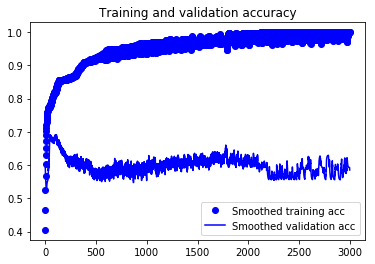

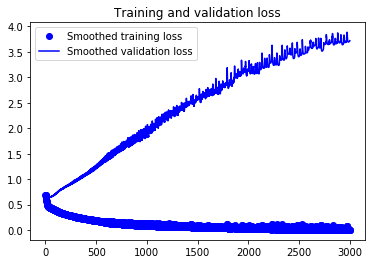

In [48]:
plot_smoothly(history)